<a href="https://colab.research.google.com/github/MohammedZuhairAhmed/Salary-prediction-using-skillset/blob/main/Final_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing required libraries


In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error , mean_absolute_percentage_error , mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from tabulate import tabulate

## Setting the path to the data file

In [ ]:
os.chdir("D:\data science\open-ended\data-files") 
missing_values= ["na",np.nan] #setting the null values to guide the pandas library for removal of null values from data
df = pd.read_csv("eda_data.csv",index_col=0,na_values=missing_values)
data = pd.read_csv("eda_data.csv",na_values=missing_values)
data = data.dropna()

## Dataset values

In [ ]:
df

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,age,python_yn,R_yn,spark,aws,excel,job_simp,seniority,desc_len,num_comp
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,47,1,0,0,0,1,data scientist,NaN,2536,0
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,36,1,0,0,0,0,data scientist,NaN,4783,0
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,10,1,0,1,0,1,data scientist,NaN,3461,0
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,55,1,0,0,0,0,data scientist,NaN,3883,3
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,22,1,0,0,0,1,data scientist,NaN,2728,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737,"Sr Scientist, Immuno-Oncology - Oncology",$58K-$111K (Glassdoor est.),Site Name: USA - Massachusetts - Cambridge\nPo...,3.9,GSK\n3.9,"Cambridge, MA","Brentford, United Kingdom",10000+ employees,1830,Company - Public,...,190,0,0,0,1,0,NaN,senior,6162,3
738,Senior Data Engineer,$72K-$133K (Glassdoor est.),THE CHALLENGE\nEventbrite has a world-class da...,4.4,Eventbrite\n4.4,"Nashville, TN","San Francisco, CA",1001 to 5000 employees,2006,Company - Public,...,14,1,0,1,1,0,data engineer,senior,6130,3
739,"Project Scientist - Auton Lab, Robotics Institute",$56K-$91K (Glassdoor est.),The Auton Lab at Carnegie Mellon University is...,2.6,Software Engineering Institute\n2.6,"Pittsburgh, PA","Pittsburgh, PA",501 to 1000 employees,1984,College / University,...,36,0,0,0,0,1,NaN,NaN,3078,0
740,Data Science Manager,$95K-$160K (Glassdoor est.),Data Science ManagerResponsibilities:\n\nOvers...,3.2,"Numeric, LLC\n3.2","Allentown, PA","Chadds Ford, PA",1 to 50 employees,-1,Company - Private,...,-1,0,0,0,0,1,manager,NaN,1642,0


## Meta data Information of the data set

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 742 entries, 0 to 741
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          742 non-null    object 
 1   Salary Estimate    742 non-null    object 
 2   Job Description    742 non-null    object 
 3   Rating             742 non-null    float64
 4   Company Name       742 non-null    object 
 5   Location           742 non-null    object 
 6   Headquarters       742 non-null    object 
 7   Size               742 non-null    object 
 8   Founded            742 non-null    int64  
 9   Type of ownership  742 non-null    object 
 10  Industry           742 non-null    object 
 11  Sector             742 non-null    object 
 12  Revenue            742 non-null    object 
 13  Competitors        742 non-null    object 
 14  hourly             742 non-null    int64  
 15  employer_provided  742 non-null    int64  
 16  min_salary         742 non

## Describing the Numerical values in the data

In [ ]:
df.describe()        

,Rating,Founded,hourly,employer_provided,min_salary,max_salary,avg_salary,same_state,age,python_yn,R_yn,spark,aws,excel,desc_len,num_comp
count,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000
mean,3.618868,1837.154987,0.032345,0.022911,74.719677,128.149596,100.626011,0.557951,46.591644,0.528302,0.002695,0.225067,0.237197,0.522911,3869.545822,1.053908
std,0.801210,497.183763,0.177034,0.149721,30.980593,45.220324,38.855948,0.496965,53.778815,0.499535,0.051882,0.417908,0.425651,0.499812,1521.495868,1.384239
min,-1.000000,-1.000000,0.000000,0.000000,15.000000,16.000000,13.500000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000
25%,3.300000,1939.000000,0.000000,0.000000,52.000000,96.000000,73.500000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2801.000000,0.000000
50%,3.700000,1988.000000,0.000000,0.000000,69.500000,124.000000,97.500000,1.000000,24.000000,1.000000,0.000000,0.000000,0.000000,1.000000,3731.000000,0.000000
75%,4.000000,2007.000000,0.000000,0.000000,91.000000,155.000000,122.500000,1.000000,59.000000,1.000000,0.000000,0.000000,0.000000,1.000000,4740.000000,3.000000
max,5.000000,2019.000000,1.000000,1.000000,202.000000,306.000000,254.000000,1.000000,276.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10051.000000,4.000000


## Plotting the top job trends in the market

<AxesSubplot: >

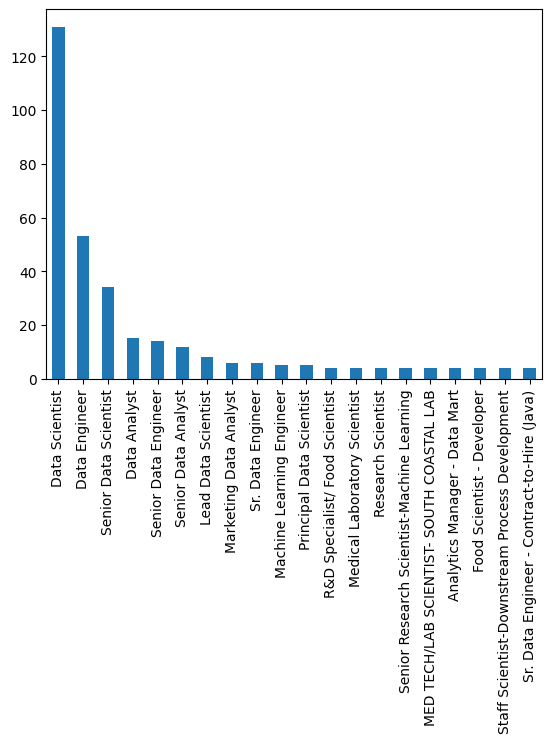

In [ ]:
df['Job Title'].value_counts().head(20).plot(kind='bar')

# objective: To predict the average salary with respect to job skills

In [ ]:
job_skill = df[['job_simp','python_yn', 'R_yn','spark','aws','excel','avg_salary']].copy()
job_skill

,job_simp,python_yn,R_yn,spark,aws,excel,avg_salary
0,data scientist,1,0,0,0,1,72.0
1,data scientist,1,0,0,0,0,87.5
2,data scientist,1,0,1,0,1,85.0
3,data scientist,1,0,0,0,0,76.5
4,data scientist,1,0,0,0,1,114.5
...,...,...,...,...,...,...,...
737,NaN,0,0,0,1,0,84.5
738,data engineer,1,0,1,1,0,102.5
739,NaN,0,0,0,0,1,73.5
740,manager,0,0,0,0,1,127.5


## Cleaning the data by using inbuilt functions and removing all null attributes

In [ ]:
job_skill.isnull().any() #checking if there are any null values

job_simp       True
python_yn     False
R_yn          False
spark         False
aws           False
excel         False
avg_salary    False
dtype: bool

In [ ]:
job_skill = job_skill.dropna() #to remove null valued records
job_skill.isnull().any()

job_simp      False
python_yn     False
R_yn          False
spark         False
aws           False
excel         False
avg_salary    False
dtype: bool

In [ ]:
job_skill.info() #cleaned dataset

<class 'pandas.core.frame.DataFrame'>
Int64Index: 558 entries, 0 to 740
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   job_simp    558 non-null    object 
 1   python_yn   558 non-null    int64  
 2   R_yn        558 non-null    int64  
 3   spark       558 non-null    int64  
 4   aws         558 non-null    int64  
 5   excel       558 non-null    int64  
 6   avg_salary  558 non-null    float64
dtypes: float64(1), int64(5), object(1)
memory usage: 34.9+ KB


## Plotting the top job domains

<AxesSubplot: >

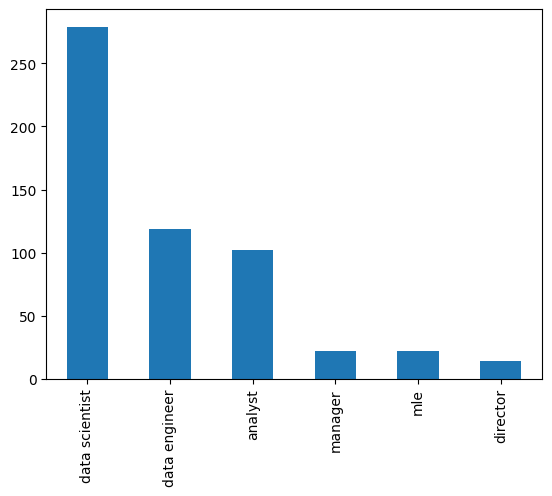

In [ ]:
job_skill['job_simp'].value_counts().plot(kind='bar')

# As we are considering binary data attributes we are applying regression models

# 1.Linear Regression Model

## Data pre-processing:

In [ ]:
# Considering the skills set to predict the salaries
features = ['python_yn', 'R_yn', 'spark', 'aws', 'excel']
x = job_skill[features]

# average salary is predicted by using the skillSet
y = job_skill['avg_salary']

## Training the Model

In [ ]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Fit the logistic regression model to the training data
model = LinearRegression()
model.fit(x_train, y_train)

# Make predictions on the test set
y_pred = model.predict(x_test)

## Plotting the Graph

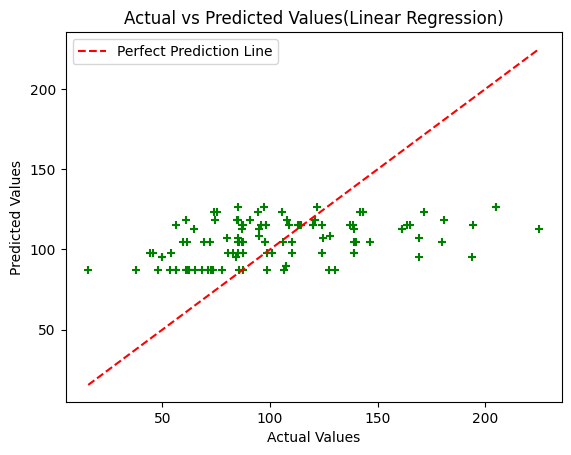

In [ ]:
# Ploting the actual vs predicted values as a scatter plot
plt.scatter(y_test, y_pred, marker='+', color='green')

# Plot the prediction line
x = np.linspace(min(y_test), max(y_test), 100)
y = x
plt.plot(x, y, '--r', label='Perfect Prediction Line')

# Add labels, title and legend
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values(Linear Regression)')
plt.legend()

# Show the plot
plt.show()

## Accuracy of the trained Model

In [ ]:
lmae = mean_absolute_error(y_test, y_pred)
lmse = mean_squared_error(y_test, y_pred)
laccuracy = 100 - (lmae / y_train.mean()) * 100
print('Mean Absolute Error: ',lmae)
print('Mean Squared Error: ',lmse)
print('Accuracy in percentage: ', laccuracy, '%')

Mean Absolute Error:  29.86337168221441
Mean Squared Error:  1367.9385882344116
Accuracy in percentage:  71.94805440128974 %


# 2.Random Forest Regression

## Data Pre-processing

In [ ]:
X = data[['python_yn', 'R_yn', 'spark', 'aws', 'excel']]
y = data['avg_salary']

# Normalize the data
scaler = StandardScaler()
X = scaler.fit_transform(X)
y = scaler.fit_transform(y.values.reshape(-1, 1))

## Training the Model

In [ ]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
regr = RandomForestRegressor(n_estimators=100, random_state=42)
regr.fit(X_train, y_train.ravel())

# Make predictions on the test set
y_pred = regr.predict(X_test)

# Denormalize the data
y_train = scaler.inverse_transform(y_train)

## Plotting the graph

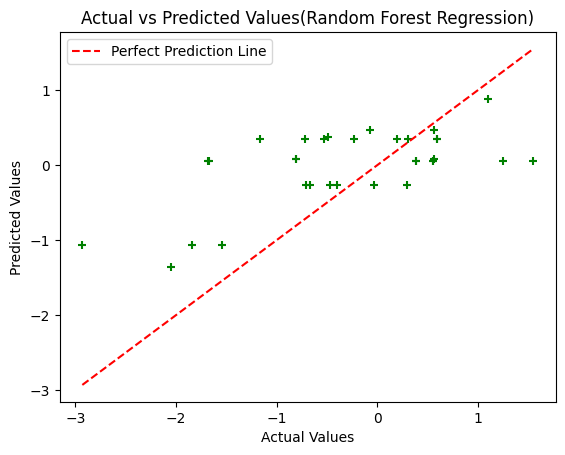

In [ ]:
# Ploting the actual vs predicted values as a scatter plot
plt.scatter(y_test, y_pred, marker='+', color='green')

# Plot the prediction line
x = np.linspace(min(y_test), max(y_test), 100)
y = x
plt.plot(x, y, '--r', label='Perfect Prediction Line')

# Add labels, title and legend
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values(Random Forest Regression)')
plt.legend()

# Show the plot
plt.show()

## Accuracy of the trained Model

In [ ]:
rmae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)
raccuracy = 100 - (rmae / y_train.mean()) * 100
print('Mean Absolute Error: ',rmae)
print('Mean Squared Error: ',rmse)
print('Accuracy in percentage: ', raccuracy, '%')

Mean Absolute Error:  0.6778579435924728
Mean Squared Error:  0.7164444144084666
Accuracy in percentage:  99.47158064988953 %


# Conclusion

## Comparing two algorithms

In [ ]:
from tabulate import tabulate

data = [['Linear Regression','','Random Forest Regression',''],
    ['MAE', 'MSE', 'MAE', 'MSE'],
    [lmae,lmse,rmae,rmse],
    ['Accuracy(%)','', 'Accuracy(%)', ''],
    [laccuracy, '', raccuracy, ''],
]

print(tabulate(data, headers='firstrow', tablefmt='grid'))


+---------------------+--------------------+----------------------------+--------------------+
| Linear Regression   |                    | Random Forest Regression   |                    |
+=====================+====================+============================+====================+
| MAE                 | MSE                | MAE                        | MSE                |
+---------------------+--------------------+----------------------------+--------------------+
| 29.86337168221441   | 1367.9385882344116 | 0.6778579435924728         | 0.7164444144084666 |
+---------------------+--------------------+----------------------------+--------------------+
| Accuracy(%)         |                    | Accuracy(%)                |                    |
+---------------------+--------------------+----------------------------+--------------------+
| 71.94805440128974   |                    | 99.47158064988953          |                    |
+---------------------+--------------------+------

Based on the analysis of the data, it can be concluded that the Random Forest Regression model performs better than the Linear Regression model. The Random Forest Regression model has a lower Mean Absolute Error (0.68) and Mean Squared Error (0.72) compared to the Linear Regression model (29.86 and 1367.94 respectively). Additionally, the accuracy of the Random Forest Regression model is higher at 99.47% compared to 71.95% for the Linear Regression model. 